In [ ]:
import joblib
import h5py
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion_matrix(cls,X,y,
                          target_names=None,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    import itertools
    cm = confusion_matrix(y,cls.predict(X))    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
class_name = ['B','C','D','E','CT']

#**1. Đánh giá model sử dụng Image to Vector**

##**1.1 Model trước khi Tuning**

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest


In [ ]:
with h5py.File('data_testVec.h5', 'r') as f:  
    X_test = np.array(f['data']) 

with h5py.File('label_testh5.h5', 'r') as f:  
    y_test = np.array(f['data']) 

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelVec/BestModel_Vec.sav'
ModelVec = joblib.load(filename)

In [ ]:
y_pred = ModelVec.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.62      0.24      0.34       101
           C       0.07      0.02      0.04        85
           D       0.80      0.67      0.73        95
           E       0.24      0.59      0.34        91
          CT       0.40      0.40      0.40        89

    accuracy                           0.39       461
   macro avg       0.43      0.39      0.37       461
weighted avg       0.44      0.39      0.38       461



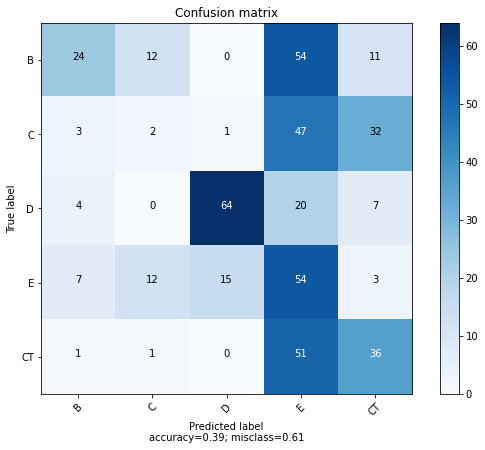

In [ ]:
plot_confusion_matrix(ModelVec,X_test,y_test,class_name)

##**1.2 Model sau khi Tuning**

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Tuning/TuningVec.sav'
TuningVec = joblib.load(filename)

In [ ]:
print(TuningVec)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
y_pred = TuningVec.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.48      0.26      0.34       101
           C       0.21      0.08      0.12        85
           D       0.85      0.64      0.73        95
           E       0.26      0.55      0.35        91
          CT       0.31      0.38      0.34        89

    accuracy                           0.39       461
   macro avg       0.42      0.38      0.38       461
weighted avg       0.43      0.39      0.38       461



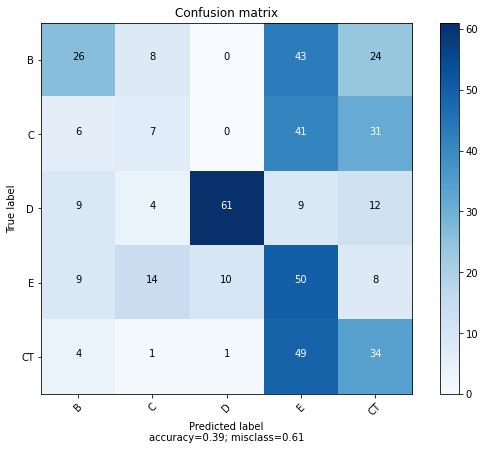

In [ ]:
plot_confusion_matrix(TuningVec,X_test,y_test,class_name)

##**1.3 Nhận Xét**

- Đối với Model(K-NN) trước khi Tuning thì kết quả dự đoán là 0.39, trong đó label E được dự đoán khá nhiều nhưng tỉ lệ dự đoán trúng label E khá thấp (0.26), nhầm lẫn tòa E và tòa B (54 bức ảnh). 

- Model sau khi Tuning mặc dù dự đoán trên tập validation có cao hơn khi chưa Tuning, độ đo f1-macro tăng 0.1 nhưng mà accuracy vẫn không thay đổi, tăng tỉ lệ dự đoán của tòa C từ 0.04 lên 0.12. Các tòa được dự đoán cân bằng hơn.

#**2. Đánh giá model sử dụng Hog**

##**2.1 Model trước khi Tuning**

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest


In [ ]:
with h5py.File('data_testHOG.h5', 'r') as f:  
    X_test = np.array(f['data']) 

with h5py.File('label_testh5.h5', 'r') as f:  
    y_test = np.array(f['data']) 

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelHOG/BestModel_HOG.sav' 
ModelHOG = joblib.load(filename)

In [ ]:
print(ModelHOG)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
y_pred = ModelHOG.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.51      0.45      0.47       101
           C       0.30      0.31      0.30        85
           D       0.98      0.48      0.65        95
           E       0.52      0.59      0.55        91
          CT       0.50      0.74      0.59        89

    accuracy                           0.51       461
   macro avg       0.56      0.51      0.51       461
weighted avg       0.57      0.51      0.52       461



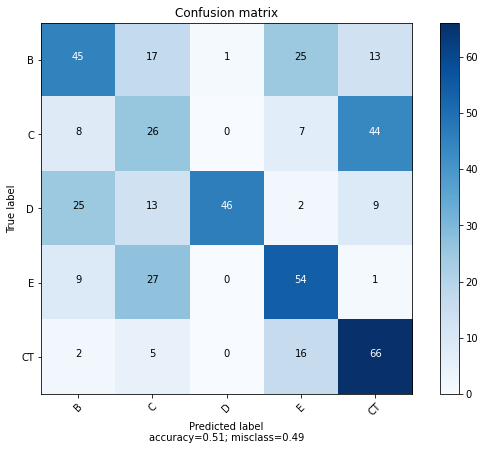

In [ ]:
plot_confusion_matrix(ModelHOG,X_test,y_test,class_name)

##**2.2 Model sau khi Tuning**

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Tuning/TuningHOG.sav'
TuningHOG = joblib.load(filename)

In [ ]:
print(TuningHOG)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
y_pred = TuningHOG.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.42      0.45      0.43       101
           C       0.33      0.27      0.30        85
           D       0.96      0.46      0.62        95
           E       0.46      0.62      0.52        91
          CT       0.50      0.66      0.57        89

    accuracy                           0.49       461
   macro avg       0.53      0.49      0.49       461
weighted avg       0.54      0.49      0.49       461



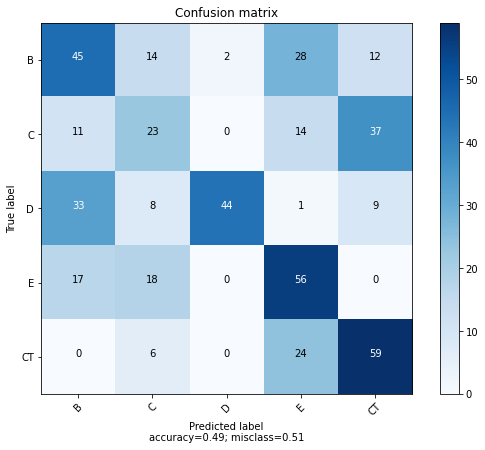

In [ ]:
plot_confusion_matrix(TuningHOG,X_test,y_test,class_name)

##**2.3 Nhận Xét**

- Mặc dù có Model sau khi tuning có accuracy trên tập validation với độ chính xác cao hơn, nhưng accuracy trên tập Test lại thấp hơn. Do một phần dùng **RandomizedSearchCV** sẽ không thể duyệt hết không gian các bộ tham số để tuning tạo ra model có xu hướng overfit, một phần là do khi trích xuất HOG thì các tòa có các cạnh tương tự nhau.

#**3. Đánh giá model sử dụng LBPs**

##**3.1 Model trước khi Tuning**

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY/SaveTest


In [ ]:
with h5py.File('data_testLBP.h5', 'r') as f:  
    X_test = np.array(f['data']) 

with h5py.File('label_testh5.h5', 'r') as f:  
    y_test = np.array(f['data']) 

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelLBP/BestModel_LBP.sav'
ModelLBP = joblib.load(filename)

In [ ]:
print(ModelLBP)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
y_pred = ModelLBP.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.39      0.69      0.50       101
           C       0.23      0.20      0.21        85
           D       0.46      0.19      0.27        95
           E       0.21      0.23      0.22        91
          CT       0.06      0.04      0.05        89

    accuracy                           0.28       461
   macro avg       0.27      0.27      0.25       461
weighted avg       0.28      0.28      0.26       461



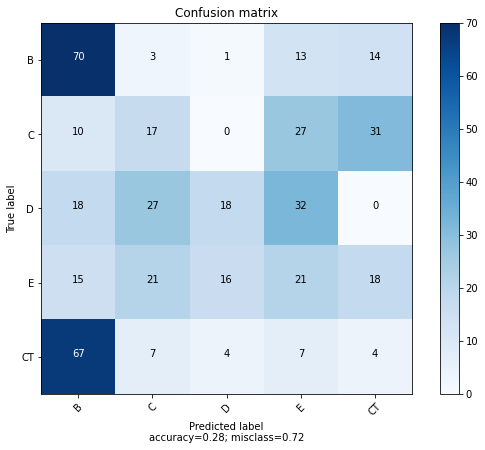

In [ ]:
plot_confusion_matrix(ModelLBP,X_test,y_test,class_name)

##**3.2 Model sau khi Turning**

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Tuning/TuningLBP.sav'
TuningLBP = joblib.load(filename)

In [ ]:
print(TuningLBP)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')


In [ ]:
y_pred = TuningLBP.predict(X_test)
print(classification_report(y_test,y_pred,target_names=class_name))

              precision    recall  f1-score   support

           B       0.52      0.30      0.38       101
           C       0.20      0.28      0.23        85
           D       0.56      0.21      0.31        95
           E       0.30      0.43      0.35        91
          CT       0.38      0.48      0.42        89

    accuracy                           0.34       461
   macro avg       0.39      0.34      0.34       461
weighted avg       0.40      0.34      0.34       461



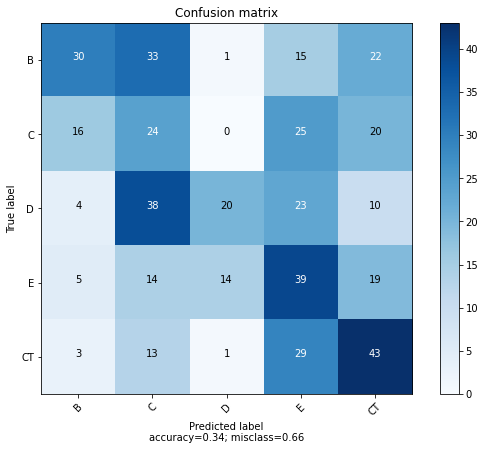

In [ ]:
plot_confusion_matrix(TuningLBP,X_test,y_test,class_name)

##**3.3 Nhận Xét**

- Đối với Model(K-NN) trước khi Tuning thì kết quả dự đoán là 0.28, model dự đoán nhiều vào tòa B, nhưng có 67 bị dự đoán sai trong khi các bức ảnh này là  
tòa CT.
- Model sau khi Tuning có accuracy (0.34) cao hơn khi chưa tuning, độ đo f1 của các tòa nhà được phân bố điều hơn. 

#**4. Kết Luận**

- Sau khi thử với cả 3 cách trích xuất và tuning thì model Logistic với trích xuất HOG
        LogisticRegression(C=1.0, class_weight=None, dual=False, auto fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Có kết quả tốt nhất trên tập Test với thang độ đo F1 (0.51). 